# Utils for latex report

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os, sys
%matplotlib inline

Let's get the *kwargs* for the best performing model:

In [216]:
#Hyperparameters grid
algos = ['dqn', 'ddqn']
batch_sizes = [32, 64, 128, 256]
learning_rates = [0.01, 0.005, 0.001, 0.0005, 0.0001]
batch_norms = ['True']
eps_inits = [1.0, 0.5]
eps_decays = [0.99, 0.995]

i=0
lines = []
for algo in algos:
    for i_batch_size, batch_size in enumerate(batch_sizes):
        for i_learning_rate, learning_rate in enumerate(learning_rates):
            for i_batch_norm, batch_norm in enumerate(batch_norms):
                for i_eps_init, eps_init in enumerate(eps_inits):
                    for i_eps_decay, eps_decay in enumerate(eps_decays):
                        #Grid index for test name interpretability
                        grid_index = str(i_batch_size)+str(i_learning_rate)+str(i_batch_norm)+str(i_eps_init)+str(i_eps_decay)
                        test_name = algo+'-'+grid_index+' '
                        #Optional arguments
                        kwarg_algo = '--algo='+str(algo)+' '
                        kwarg_batch_size = '--batch_size='+str(batch_size)+' '
                        kwarg_lr = '--lr='+str(learning_rate)+' '
                        kwarg_BN = '--BN='+str(batch_norm)+' '
                        kwarg_eps_init = '--eps_init='+str(eps_init)+' '
                        kwarg_eps_decay = '--eps_decay='+str(eps_decay)
                        
                        #concatenate kwargs
                        kwargs = kwarg_algo + kwarg_batch_size + kwarg_lr + kwarg_BN + kwarg_eps_init + kwarg_eps_decay
                        
                        run_line = 'python main.py -t '+ test_name + kwargs
                        
                        lines.append(run_line)
                        
                        print(run_line)
                        
                        i = i+1

python main.py -t dqn-00000 --algo=dqn --batch_size=32 --lr=0.01 --BN=True --eps_init=1.0 --eps_decay=0.99
python main.py -t dqn-00001 --algo=dqn --batch_size=32 --lr=0.01 --BN=True --eps_init=1.0 --eps_decay=0.995
python main.py -t dqn-00010 --algo=dqn --batch_size=32 --lr=0.01 --BN=True --eps_init=0.5 --eps_decay=0.99
python main.py -t dqn-00011 --algo=dqn --batch_size=32 --lr=0.01 --BN=True --eps_init=0.5 --eps_decay=0.995
python main.py -t dqn-01000 --algo=dqn --batch_size=32 --lr=0.005 --BN=True --eps_init=1.0 --eps_decay=0.99
python main.py -t dqn-01001 --algo=dqn --batch_size=32 --lr=0.005 --BN=True --eps_init=1.0 --eps_decay=0.995
python main.py -t dqn-01010 --algo=dqn --batch_size=32 --lr=0.005 --BN=True --eps_init=0.5 --eps_decay=0.99
python main.py -t dqn-01011 --algo=dqn --batch_size=32 --lr=0.005 --BN=True --eps_init=0.5 --eps_decay=0.995
python main.py -t dqn-02000 --algo=dqn --batch_size=32 --lr=0.001 --BN=True --eps_init=1.0 --eps_decay=0.99
python main.py -t dqn-02001 

# Monitor

In [35]:
df = pd.read_csv('log.txt', sep='\t')
#runs = df.shape[0]
#print('Total runs :', runs, '/', i)

In [36]:
df

,Test_name,Steps_to_solve,Final_eps,Episodes_min_eps
0,dqn-00000,1000,0.010000,459
1,dqn-00001,1000,0.010000,919
2,dqn-00010,1000,0.010000,390
3,dqn-00011,1000,0.010000,781
4,dqn-01000,1000,0.010000,459
5,dqn-01001,1000,0.010000,919
6,dqn-01010,566,0.010000,390
7,dqn-01011,1000,0.010000,781
8,dqn-02000,487,0.010000,459
9,dqn-02001,598,0.049912,1000


In [4]:
#function: get kwargs given a test name
def get_kwargs(name, to_latex = False):
    kwargs_name = name+'-kwargs.csv'
    test_folder = os.path.join(os.getcwd(), 'tests')
    kwargs_file = os.path.join(test_folder, kwargs_name)
    kwargs= pd.read_csv(kwargs_file)
    if to_latex:
        print(kwargs.to_latex(index=False))
    else:
        return kwargs

### Base case model

#### DQN

In [219]:
df = pd.read_csv('log.txt', sep='\t')
base_case = 'dqn-basecase'
steps_solve = df.loc[df['Test_name']==base_case]['Steps_to_solve'].item()
steps_solve-100

573

In [220]:
get_kwargs(base_case)

,ALGO,dqn
0,TRAIN_EPISODES,1000
1,BUFFER_SIZE,1000000
2,BATCH_SIZE,64
3,GAMMA,0.99
4,TAU,0.001
5,EPS_INIT,1.0
6,EPS_DECAY,0.995
7,LR,0.0001
8,UPDATE_EVERY,5
9,ACT_EVERY,1


In [169]:
#get latex table
get_kwargs(base_case, to_latex = True)

\begin{tabular}{ll}
\toprule
           ALGO &      dqn \\
\midrule
 TRAIN\_EPISODES &     1000 \\
    BUFFER\_SIZE &  1000000 \\
     BATCH\_SIZE &       64 \\
          GAMMA &     0.99 \\
            TAU &    0.001 \\
       EPS\_INIT &      1.0 \\
      EPS\_DECAY &    0.995 \\
             LR &    0.001 \\
   UPDATE\_EVERY &        5 \\
      ACT\_EVERY &        1 \\
            FC1 &       32 \\
            FC2 &       64 \\
             BN &     True \\
           SEED &       42 \\
\bottomrule
\end{tabular}



#### DDQN

In [201]:
base_case = 'ddqn-basecase'
steps_solve = df.loc[df['Test_name']==base_case]['Steps_to_solve'].item()
steps_solve-100

347

In [198]:
get_kwargs(base_case)

,ALGO,ddqn
0,TRAIN_EPISODES,1000
1,BUFFER_SIZE,1000000
2,BATCH_SIZE,64
3,GAMMA,0.99
4,TAU,0.001
5,EPS_INIT,1.0
6,EPS_DECAY,0.995
7,LR,0.001
8,UPDATE_EVERY,5
9,ACT_EVERY,1


## Base case results

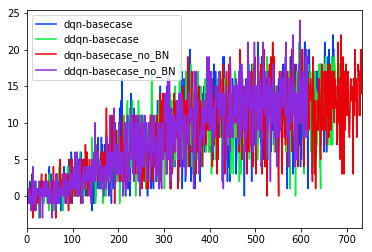

In [288]:
base_case_names = ['dqn-basecase','ddqn-basecase', 'dqn-basecase_no_BN', 'ddqn-basecase_no_BN']
plot_df = pd.DataFrame()
for model in base_case_names:
    name = './tests/'+ model +'-scores.csv'
    scores = pd.read_csv(name, index_col=None)
    scores = pd.Series(scores['Scores'])
    plot_df = pd.concat([plot_df, scores], axis=1)
plot_df.columns = base_case_names    
plot_df.plot()

In [12]:
def save_plot(name):
    plot_name = './figures/'+ name +'-plot.png'
    plt.savefig(plot_name)

In [11]:
def plot_rewards(test_names, smoothing_window = 100): 
    #create df from test names
    plot_df = pd.DataFrame()
    for model in test_names:
        name = './tests/'+ model +'-scores.csv'
        scores = pd.read_csv(name, index_col=None)
        scores = pd.Series(scores['Scores'])
        plot_df = pd.concat([plot_df, scores], axis=1)
    plot_df.columns = test_names  
    #plot    
    legends = test_names 
    fig = plt.figure(figsize=(10,5))
    plt.grid(False)
    plt.style.use('seaborn-bright')
    rewards_smoothed = plot_df.rolling(smoothing_window, min_periods=smoothing_window).mean()
    plt.plot(rewards_smoothed)
    plt.xlabel("Episode")
    plt.ylabel("Episode Reward (Smoothed)")
    plt.legend(legends)

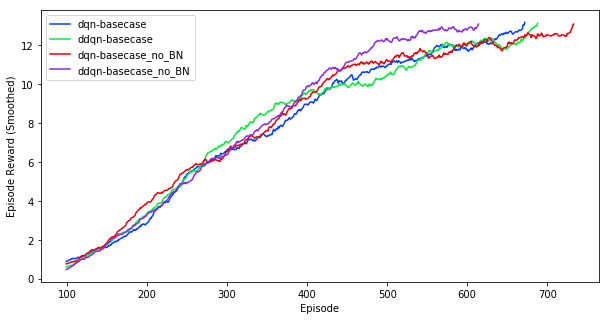

In [302]:
base_case_names = ['dqn-basecase','ddqn-basecase', 'dqn-basecase_no_BN', 'ddqn-basecase_no_BN']
plot_rewards(base_case_names)
save_plot('basecase')

In [ ]:

Test_name Steps_to_solve Final_eps
dqn-basecase_no_BN 734 0.025243
1ddqn-basecase 689 0.031630 
ddqn-basecase_no_BN 615 0.045835 
ddqn-bestnoBN 380 0.010973 

### Best model

Min episodes to solve:

In [189]:
df['Steps_to_solve'].min() - 100

239

Kwargs for the best dqn model:

In [199]:
best_model_name = df.loc[df['Steps_to_solve']==df['Steps_to_solve'].min() , 'Test_name' ].item()
print(best_model_name)
get_kwargs(best_model_name)

dqn-33010


,ALGO,dqn
0,TRAIN_EPISODES,1000
1,BUFFER_SIZE,1000000
2,BATCH_SIZE,256
3,GAMMA,0.99
4,TAU,0.001
5,EPS_INIT,0.5
6,EPS_DECAY,0.99
7,LR,0.0005
8,UPDATE_EVERY,5
9,ACT_EVERY,1


In [170]:
get_kwargs(best_model_name, to_latex = True)

\begin{tabular}{ll}
\toprule
           ALGO &      dqn \\
\midrule
 TRAIN\_EPISODES &     1000 \\
    BUFFER\_SIZE &  1000000 \\
     BATCH\_SIZE &      256 \\
          GAMMA &     0.99 \\
            TAU &    0.001 \\
       EPS\_INIT &      0.5 \\
      EPS\_DECAY &     0.99 \\
             LR &   0.0005 \\
   UPDATE\_EVERY &        5 \\
      ACT\_EVERY &        1 \\
            FC1 &       32 \\
            FC2 &       64 \\
             BN &     True \\
           SEED &       42 \\
\bottomrule
\end{tabular}



## Best DDQN model

In [6]:
best_ddqn = 'ddqn-23010'

In [7]:
get_kwargs(best_ddqn)

,ALGO,ddqn
0,TRAIN_EPISODES,1000
1,BUFFER_SIZE,1000000
2,BATCH_SIZE,128
3,GAMMA,0.99
4,TAU,0.001
5,EPS_INIT,0.5
6,EPS_DECAY,0.99
7,LR,0.0005
8,UPDATE_EVERY,5
9,ACT_EVERY,1


In [8]:
get_kwargs(best_ddqn, to_latex = True)

\begin{tabular}{ll}
\toprule
           ALGO &     ddqn \\
\midrule
 TRAIN\_EPISODES &     1000 \\
    BUFFER\_SIZE &  1000000 \\
     BATCH\_SIZE &      128 \\
          GAMMA &     0.99 \\
            TAU &    0.001 \\
       EPS\_INIT &      0.5 \\
      EPS\_DECAY &     0.99 \\
             LR &   0.0005 \\
   UPDATE\_EVERY &        5 \\
      ACT\_EVERY &        1 \\
            FC1 &       32 \\
            FC2 &       64 \\
             BN &     True \\
           SEED &       42 \\
\bottomrule
\end{tabular}



## Base case vs best models

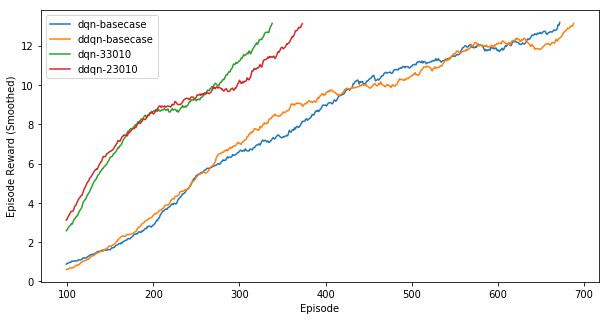

In [13]:
base_case_names = ['dqn-basecase','ddqn-basecase', 'dqn-33010', 'ddqn-23010']
plot_rewards(base_case_names)
save_plot('best_vs_basecase')

#### Latex report utils

In [172]:
#Hyperparameters grid
dict = {'algos' : ['dqn', 'ddqn'],
        'batch_sizes' : [32, 64, 128, 256],
        'learning_rates' : [0.01, 0.005, 0.001, 0.0005, 0.0001],
        'batch_norms' : ['True', 'False'],
        'eps_inits' : [1.0, 0.5],
        'eps_decays' : [0.99, 0.995]
       }
dict

{'algos': ['dqn', 'ddqn'],
 'batch_norms': ['True', 'False'],
 'batch_sizes': [32, 64, 128, 256],
 'eps_decays': [0.99, 0.995],
 'eps_inits': [1.0, 0.5],
 'learning_rates': [0.01, 0.005, 0.001, 0.0005, 0.0001]}

In [176]:
hyperp_df = pd.DataFrame.from_dict(dict, orient='index')
hyperp_df

,0,1,2,3,4
algos,dqn,ddqn,NaN,NaN,NaN
batch_sizes,32,64,128.000,256.0000,NaN
learning_rates,0.01,0.005,0.001,0.0005,0.0001
batch_norms,True,False,NaN,NaN,NaN
eps_inits,1,0.5,NaN,NaN,NaN
eps_decays,0.99,0.995,NaN,NaN,NaN


In [177]:
print(pd.DataFrame.from_dict(dict, orient='index').to_latex())

\begin{tabular}{lllrrr}
\toprule
{} &     0 &      1 &        2 &         3 &       4 \\
\midrule
algos          &   dqn &   ddqn &      NaN &       NaN &     NaN \\
batch\_sizes    &    32 &     64 &  128.000 &  256.0000 &     NaN \\
learning\_rates &  0.01 &  0.005 &    0.001 &    0.0005 &  0.0001 \\
batch\_norms    &  True &  False &      NaN &       NaN &     NaN \\
eps\_inits      &     1 &    0.5 &      NaN &       NaN &     NaN \\
eps\_decays     &  0.99 &  0.995 &      NaN &       NaN &     NaN \\
\bottomrule
\end{tabular}



In [37]:
steps = df['Steps_to_solve']
for i in range(len(steps)):
    if steps[i]<1000:
        steps[i]-=100
df['Steps_to_solve'] = steps
df

C:\Users\nbbor\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


,Test_name,Steps_to_solve,Final_eps,Episodes_min_eps
0,dqn-00000,1000,0.010000,459
1,dqn-00001,1000,0.010000,919
2,dqn-00010,1000,0.010000,390
3,dqn-00011,1000,0.010000,781
4,dqn-01000,1000,0.010000,459
5,dqn-01001,1000,0.010000,919
6,dqn-01010,466,0.010000,390
7,dqn-01011,1000,0.010000,781
8,dqn-02000,387,0.010000,459
9,dqn-02001,498,0.049912,1000


In [38]:
print(df.to_latex())

\begin{tabular}{llrrr}
\toprule
{} &            Test\_name &  Steps\_to\_solve &  Final\_eps &  Episodes\_min\_eps \\
\midrule
0   &            dqn-00000 &            1000 &   0.010000 &               459 \\
1   &            dqn-00001 &            1000 &   0.010000 &               919 \\
2   &            dqn-00010 &            1000 &   0.010000 &               390 \\
3   &            dqn-00011 &            1000 &   0.010000 &               781 \\
4   &            dqn-01000 &            1000 &   0.010000 &               459 \\
5   &            dqn-01001 &            1000 &   0.010000 &               919 \\
6   &            dqn-01010 &             466 &   0.010000 &               390 \\
7   &            dqn-01011 &            1000 &   0.010000 &               781 \\
8   &            dqn-02000 &             387 &   0.010000 &               459 \\
9   &            dqn-02001 &             498 &   0.049912 &              1000 \\
10  &            dqn-02010 &             302 &   0.010000 &    